# Data Extraction Notebook

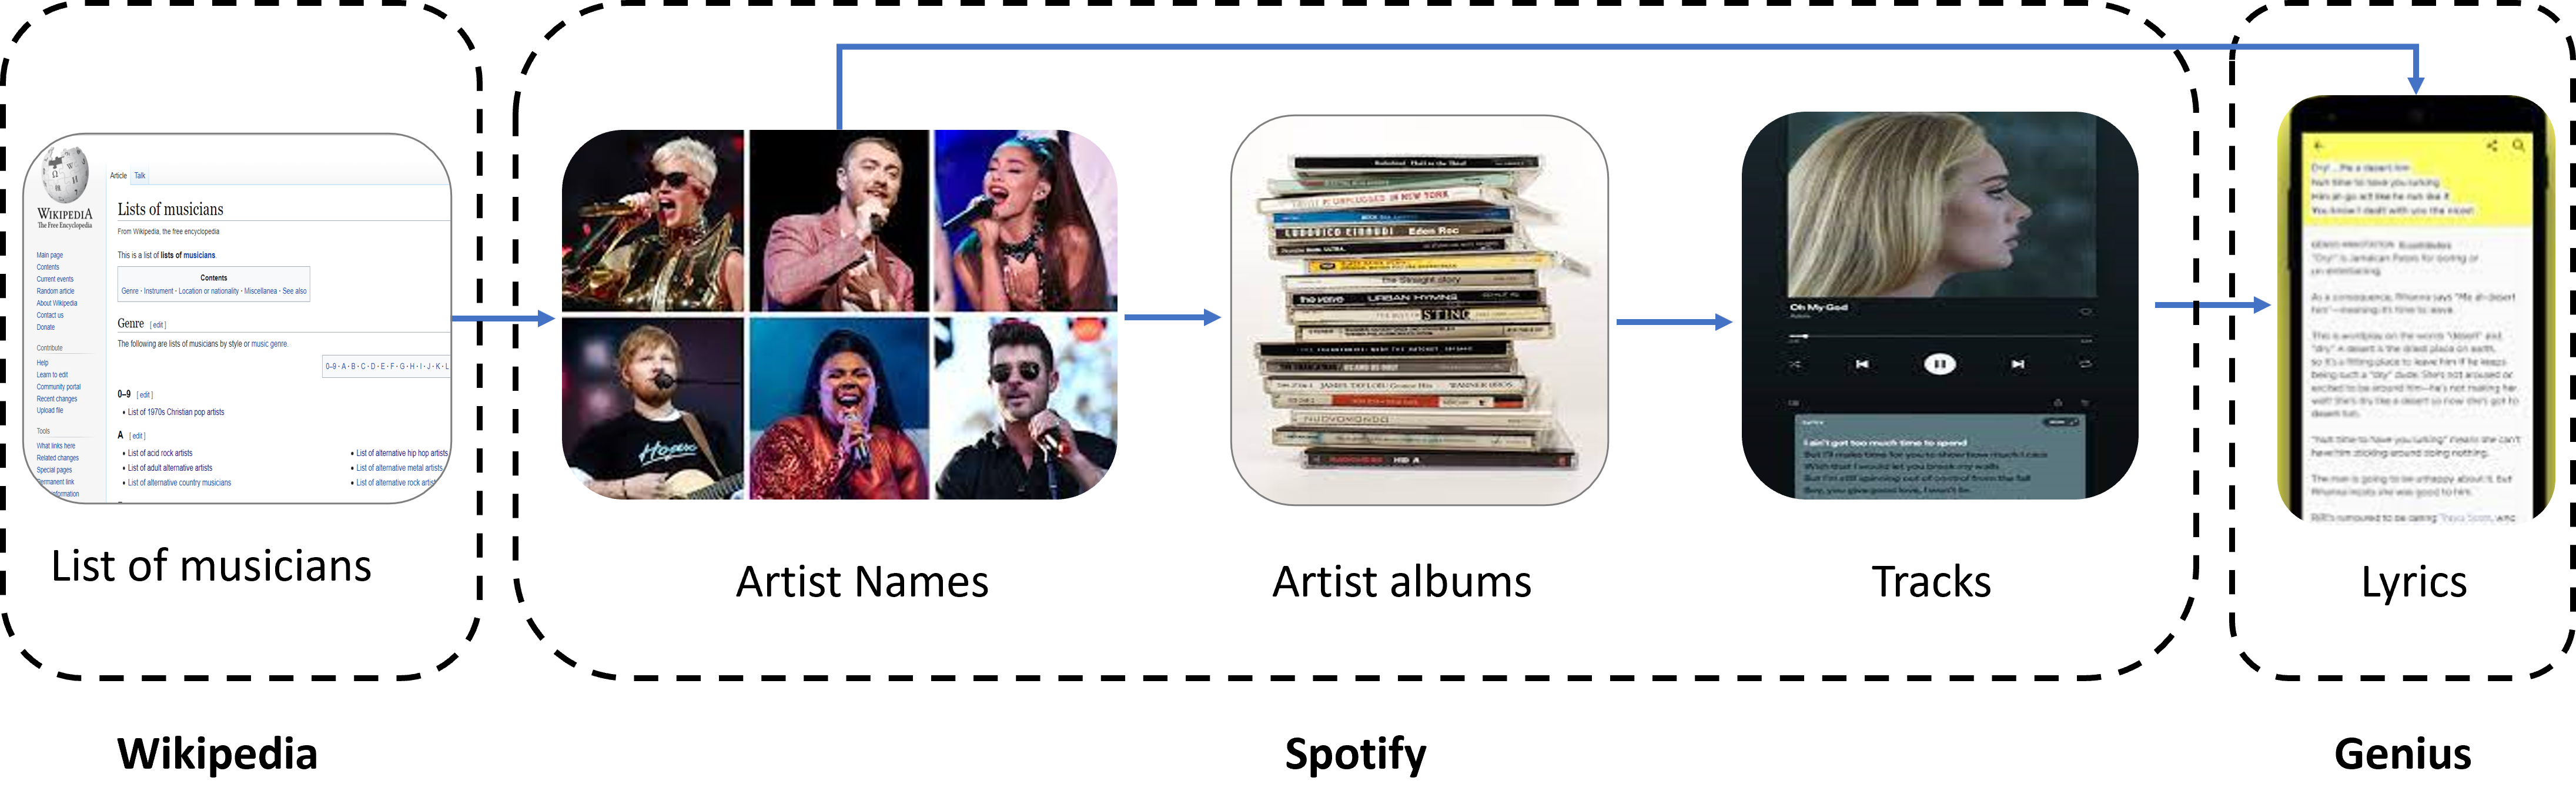

#  Scope
This notebook contains the <b>code for data extraction only</b>. Data has been extracted from the following sources:
- [Wikipedia](https://en.wikipedia.org/wiki/Lists_of_musicians)
  * Artist Names
- [Spotify(via Spotipy API)](https://spotipy.readthedocs.io/en/2.21.0/)
  * Artist genres
  * Artist followers, popularity index
  * Artist songs
  * Song audio attributes
  * Song popularity 
- [Genius.com(via Lyrics Genius API)](https://docs.genius.com/)

### Data extraction workflow
The list of artists is obtained by copying the hyperlinks present in the wiki page of list of musicians into a text file. The text file is then loaded as a pandas dataframe and those links are visited succcessively. The musicians listed within each of those pages were compiled into one big list. These artist names were searched in the Spotify database through the Spotipy API and all the albums and songs were extracted pertaining to those artists. The lyrics of the songs were obtained from Lyrics genius API via their API.

### Operational details
The data needs had evolved during the project and various data decisions were made at different points of time. Extracting all data elements was performed in a staggered manner and lyrics extraction was performed in multiple iterations. 

As a first step, all the links present in the [List of musicians wiki page](https://en.wikipedia.org/wiki/Lists_of_musicians) are printed below

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
session = requests.Session()
url = "https://en.wikipedia.org/w/api.php"
params = {
    "action": "query",
    "format": "json",
    "titles": "Lists_of_musicians",
    "prop": "links",
    "pllimit": "max"
}
response = session.get(url=url, params=params)
data = response.json()
pages = data["query"]["pages"]

pg_count = 1
page_titles = []
print("Page %d" % pg_count)
for key, val in pages.items():
    for link in val["links"]:
        print(link["title"])
        page_titles.append(link["title"])
while "continue" in data:
    plcontinue = data["continue"]["plcontinue"]
    params["plcontinue"] = plcontinue

    response = session.get(url=url, params=params)
    data = response.json()
    pages = data["query"]["pages"]

    pg_count += 1

    print("\nPage %d" % pg_count)
    for key, val in pages.items():
        for link in val["links"]:
            print(link["title"])
            page_titles.append(link["title"])

print("%d titles found." % len(page_titles))

Page 1
Boy band
Brass band
Chronological list of Italian classical composers
Honorific nicknames in popular music
List of 1970s Christian pop artists
List of 1970s punk rock musicians
List of Afghan singers
List of African musicians
List of American death metal bands
List of American female country singers
List of American folk musicians in Washington
List of American grunge bands
List of Anglo-Quebecer musicians
List of Appalachian dulcimer players
List of Arabic pop musicians
List of Argentine musicians
List of Australian composers
List of Australian female composers
List of Austrian composers
List of Austrians in music
List of Azerbaijani composers
List of Azerbaijani opera singers
List of Belarusian musical groups
List of Belarusian musicians
List of Belgian bands and artists
List of Brazilian composers
List of Brazilian musicians
List of British Invasion artists
List of British blues musicians
List of British classical composers
List of British music hall musicians
List of Britpop

The scope of links is limited to the genre wise classes (although the genre information is sourced from Spotify). While extracting the links, it is seen that they are not sorted in the same way ie they appear lexicographically as they appear on the page (first by Genre, then by Nationality and so on). To make things easier, the hyperlinks were copied into a text file from the Genre classification only and read below. Those links are visited and a list of artists is compiled as printed below.

In [3]:
import requests
import pandas as pd
import numpy as np
musicians = pd.read_csv('links_of_musicians.txt',header=None) #file containing the links from the first page
musicians.rename(columns={0:'Link'},inplace=True)
musicians['Link'] = musicians['Link'].str.replace(" ","_")
session = requests.Session()
page_titles = []
for i in range(len(musicians)):
    print(musicians.loc[i,'Link']," start")

    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": musicians.loc[i,'Link'],
        "prop": "links",
        "pllimit": "max"
    }

    response = session.get(url=url, params=params)
    data = response.json()
    pages = data["query"]["pages"]
    if str(pages).find("missing") == -1:
        pg_count = 1

        while "continue" in data:
            plcontinue = data["continue"]["plcontinue"]
            params["plcontinue"] = plcontinue

            response = session.get(url=url, params=params)
            data = response.json()
            pages = data["query"]["pages"]

            pg_count += 1
            for key, val in pages.items():
                for link in val["links"]:
                    temp = [musicians.loc[i,'Link'],link["title"]]
                    page_titles.append(temp)
        print(musicians.loc[i,'Link']," complete")

page_titles_df = pd.DataFrame(page_titles,columns=['links','ArtistName'])
print(len(page_titles_df))
page_titles_df.head()

List_of_acid_rock_artists  start
List_of_acid_rock_artists  complete
List_of_adult_alternative_artists  start
List_of_adult_alternative_artists  complete
List_of_alternative_country_musicians  start
List_of_alternative_country_musicians  complete
List_of_alternative_hip_hop_artists  start
List_of_alternative_hip_hop_artists  complete
List_of_alternative_metal_artists  start
List_of_alternative_metal_artists  complete
List_of_alternative_rock_artists  start
List_of_alternative_rock_artists  complete
List_of_ambient_music_artists  start
List_of_ambient_music_artists  complete
List_of_anarcho-punk_bands  start
List_of_anarcho-punk_bands  complete
List_of_Arabic_pop_musicians  start
List_of_Arabic_pop_musicians  complete
List_of_baroque_pop_artists  start
List_of_baroque_pop_artists  complete
List_of_bebop_musicians  start
List_of_bebop_musicians  complete
List_of_bhangra_artists  start
List_of_bhangra_artists  complete
List_of_big_band_musicians  start
List_of_big_band_musicians  complete

List_of_Italo_disco_artists_and_songs  complete
List_of_J-pop_artists  start
List_of_J-pop_artists  complete
List_of_Japanoise_artists  start
List_of_Japanoise_artists  complete
List_of_jazz_fusion_musicians  start
List_of_jazz_fusion_musicians  complete
List_of_jazz_musicians  start
List_of_jazz_musicians  complete
List_of_jump_blues_musicians  start
List_of_jump_blues_musicians  complete
List_of_jungle_and_drum_and_bass_artists  start
List_of_jungle_and_drum_and_bass_artists  complete
List_of_K-pop_artists  start
List_of_K-pop_artists  complete
List_of_Klezmer_bands  start
List_of_Klezmer_bands  complete
List_of_klezmer_musicians  start
List_of_klezmer_musicians  complete
List_of_Latin_American_rock_musicians  start
List_of_Latin_American_rock_musicians  complete
List_of_Latin_freestyle_musicians_and_songs  start
List_of_Latin_freestyle_musicians_and_songs  complete
List_of_Latin_pop_artists  start
List_of_Latin_pop_artists  complete
List_of_lo-fi_bands  start
List_of_lo-fi_bands  co

links       ArtistName
0  List_of_adult_alternative_artists   Matt Nathanson
1  List_of_adult_alternative_artists    Matthew Sweet
2  List_of_adult_alternative_artists  Mayer Hawthorne
3  List_of_adult_alternative_artists       Mazzy Star
4  List_of_adult_alternative_artists        Mediabase

Now that the list of artists is in place, the artists names are now searched in the Spotify database via the Spotipy API and the artist level details such as artist id, genres, followers count and popularity index were extracted.

In [7]:
import time
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
client_credentials_manager = SpotifyClientCredentials('######','######')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=50)

artist_dm = []
for i in range(len(page_titles_df)):
    name = page_titles_df.loc[i,'ArtistName']
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        artist = items[0]
        temp = [artist['name'], artist['id'],artist['genres'],artist['followers']['total'],artist['popularity']]
        artist_dm.append(temp)
artist_dm_df = pd.DataFrame(artist_dm,columns=['ArtistName','id','genres','followers','popularity'])
artist_dm_df.to_csv("artist_dm_df.csv")

Once the Spotify artist ids have been extracted, all the albums of the artists and the album IDs are also extracted from Spotify as seen below.

In [8]:
import time
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
client_credentials_manager = SpotifyClientCredentials('######','######')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=30)


artist_album = []
for i in range(len(artist_dm_df)):
    if i%1000 == 0 & i> 0:
        time.sleep(1)
    name = artist_dm_df.loc[i,'id']
    lz_uri = 'spotify:artist:'+name  
    results = sp.artist_albums(lz_uri, album_type='album')
    albums = results['items']
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])

    for album in albums:
        temp = [artist_dm_df.loc[i,'id'],artist_dm_df.loc[i,'ArtistName'],album['name'],album['id']]
        artist_album.append(temp)
        
artist_album_df = pd.DataFrame(artist_album,columns=['ArtistID','ArtistName','AlbumName','AlbumID'])
artist_album_df.to_csv("artist_album_df.csv")

Using the album IDs extracted above, all the tracks from the albums are now extracted as shown below.

In [9]:
import time
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
client_credentials_manager = SpotifyClientCredentials('######','######')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=30)

artist_album_tracks = []
for i in range(len(artist_album_df)):
    results = sp.album_tracks(artist_album_df.loc[i,'AlbumID'])
    for result in results['items']:
        for r in result['artists']:
            temp = [artist_album_df.loc[i,'AlbumID'],result['id'],result['name'],r['name'], r['id']]
            artist_album_tracks.append(temp)
artist_album_tracks.to_csv("artist_album_tracks_df.csv")

### Popularity of tracks

Additionally, the popularity information of the tracks has been extracted separately as this accessed via a different Spotipy query. Note that this popularity index is at a track level and it different from the artist popularity index. Infact, the artist popularity index is derived from the track level popularity.

In [6]:
import numpy as np
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials('######','######')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=30)
popularity_list = []
limit_nearest_fifty= (int(len(artist_album_tracks_df)/50)+1)*50 #50 tracks can be searched in one query
trackarrayindex = np.arange(0,limit_nearest_fifty,50)
for i in range(len(trackarrayindex)-1):
    input_tracks = artist_album_tracks_df['TrackID'][trackarrayindex[i]:trackarrayindex[i+1]]
    results = sp.tracks(tracks=input_tracks)
    for  r in results['tracks']:
        try:
            temp = [r['id'],r['popularity']]
            popularity_list.append(temp)
        except:
            continue
'''Below part is used to extract all rows that were a remainder of 50 from the end'''

trackarrayindex1 = len(popularity_list)
trackarrayindex2 = len(artist_album_tracks_df)
input_tracks = artist_album_tracks_df['TrackID'][trackarrayindex1:trackarrayindex2]
results = sp.tracks(tracks=input_tracks)
for  r in results['tracks']:
    try:
        temp = [r['id'],r['popularity']]
        popularity_list.append(temp)
    except:
            continue
popularity_list_df = pd.DataFrame(popularity_list,columns=['TrackID','TrackPopularity'])
popularity_list_df.drop_duplicates(inplace=True)
popularity_list_df.to_csv("popularity_list_df.csv")

### Audio features
The next step is to extract the audio features for the tracks from Spotify. Data was extracted only for the subgraph that was analysed during the project. The node metadata was stored into a file and then loaded here to extract the artists that are in scope. The tracks that are credited to these artists are then considered inscope.

In [7]:
graph_attributes = pd.read_csv("graph_attributes_1068.csv")
inscope_tracks = artist_album_tracks_df.merge(graph_attributes[['ArtistName']],how='inner',left_on='ArtistName',
                                             right_on='ArtistName')

In [8]:
import numpy as np
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials('######','######')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=30)
audio_features = []

limit_nearest_hundred= (int(len(inscope_tracks)/100)+1)*100
trackarrayindex = np.arange(0,limit_nearest_hundred,100)
for i in range(len(trackarrayindex)-1):
    input_tracks = inscope_tracks['TrackID'][trackarrayindex[i]:trackarrayindex[i+1]]
    results = sp.audio_features(tracks=input_tracks)
    for r in results:
        try:
            temp = [r['id'],r['danceability'],r['energy'],r['key'],r['loudness'],r['mode'],
                    r['speechiness'],r['acousticness'],r['instrumentalness'],r['liveness'],r['valence'],r['tempo']]
            audio_features.append(temp)
        except:
            continue

trackarrayindex1 = len(audio_features)
trackarrayindex2 = len(inscope_tracks)
input_tracks = inscope_tracks['TrackID'][trackarrayindex1:trackarrayindex2]
results = sp.audio_features(tracks=input_tracks)
for r in results:
    try:
        temp = [r['id'],r['danceability'],r['energy'],r['key'],r['loudness'],r['mode'],
                r['speechiness'],r['acousticness'],r['instrumentalness'],r['liveness'],r['valence'],r['tempo']]
        audio_features.append(temp)
    except:
            continue

Now that the track names have been extracted, these tracks are queried into the Genius.com database via the LyricsGenius API using the track name and the artist name. As the artist collaboration network is quite big, the lyrics of only those tracks that were performed by the in-scope artists (artists that were part of the network obtained after apply backbone method) were extracted. There were 1,038 artists in the sampled network and the node attributes were exported into a csv while performing the analysis. The file is imported into this notebook(as seen above) and tracks relevant to only these artists have been taken forward for lyrics extraction. \
<b>Note:</b> Extracting lyrics data was a time consuming exercise and was performed in multiple iterations.

In [9]:
'''Before querying the lyrics API, the song names are cleaned up as covers/ remixes would still keep the lyrics 
same in most scenarios. The songs are then bifurcated into solos and collaborations based on the count of artists
credited to it.'''
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.lower()
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace(r"[\(\[].*?[\)\]]", "", regex=True)
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("remix", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("edit", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("original", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("rework", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("remix", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("radio", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("remix", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("mix", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("lofi", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("mashup", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("remix", "")
artist_album_tracks_df['TrackName'] = artist_album_tracks_df['TrackName'].str.replace("-", "")

song_countofartists = pd.DataFrame(artist_album_tracks_df['TrackID'].value_counts())

song_countofartists.rename(columns = {'TrackID':'CountofArtists'},inplace=True)
song_various = song_countofartists[song_countofartists['CountofArtists']>1]
song_various.reset_index(inplace=True)
song_various.rename(columns={'index':'TrackID'},inplace=True)
song_various['song_various'] = 1
collabsongs = artist_album_tracks_df.merge(song_various,how='inner',left_on='TrackID',right_on='TrackID')
collabsongs.drop_duplicates(['TrackID','ArtistName'],inplace=True)
collabsongs = collabsongs.merge(graph_attributes[['ArtistName']],how='inner',left_on='ArtistName',right_on='ArtistName')
solosongs = artist_album_tracks_df[~artist_album_tracks_df['TrackID'].isin(list(collabsongs['TrackID']))]
solosongs = solosongs.merge(graph_attributes[['ArtistName']],how='inner',left_on='ArtistName',right_on='ArtistName')

### Extracting solo songs

In [11]:
import lyricsgenius
import time
client_access_token = '######'
genius = lyricsgenius.Genius(client_access_token)
genius.timeout = 50
genius.verbose = False
genius.remove_section_headers = True
genius.skip_non_songs = False
genius.excluded_terms = ["(Remix)", "(Live)"]
artist_songlyrics = []
for i in range(len(solosongs)): #going through the artist one by one
    try:
        song1 = genius.search_song(solosongs.loc[i,'TrackName'], solosongs.loc[i,'ArtistName'])
        if song1 != None:
            if len(song1.lyrics) > 10:
                temp = [solosongs.loc[i,'ArtistName'],solosongs.loc[i,'TrackName'],solosongs.loc[i,'TrackID']
                        ,song1.lyrics]
                artist_songlyrics.append(temp)
                if len(artist_songlyrics)%1000==0:
                    artist_songlyrics_df =pd.DataFrame(artist_songlyrics,columns=['ArtistName','TrackName','TrackID','Lyrics'])
                    artist_songlyrics_df.to_csv("solotracks_df.csv")
    except:
        continue          

### Extracting collaboration songs

In [32]:
client_access_token = '######'
genius = lyricsgenius.Genius(client_access_token)
genius.timeout = 50
genius.verbose = False
genius.remove_section_headers = True
genius.skip_non_songs = False
genius.excluded_terms = ["(Remix)", "(Live)"]
artist_songlyrics = []
for i in range(len(collabsongs)): #going through the artist one by one
    try:
        song1 = genius.search_song(collabsongs.loc[i,'TrackName'], collabsongs.loc[i,'ArtistName'])
        if song1 != None:
            if len(song1.lyrics) > 10:
                temp = [collabsongs.loc[i,'ArtistName'],collabsongs.loc[i,'TrackName'],collabsongs.loc[i,'TrackID']
                        ,song1.lyrics]
                artist_songlyrics.append(temp)
                if len(artist_songlyrics)%1000==0:
                    artist_songlyrics_df =pd.DataFrame(artist_songlyrics,columns=['ArtistName','TrackName','TrackID','Lyrics'])
                    artist_songlyrics_df.to_csv("artist_collabsonglyrics_df.csv")
    except:
        continue          

## Final list of datasets
  - Text file with hyperlinks: links_of_musicians.txt
  - Artist level info: artist_dm_df.csv
  - Album info: artist_album_df.csv
  - Track Info: artist_album_tracks_df.csv
  - Track popularity info : popularity_list_df.csv
  - Track audio features: audio_features.csv
  - Collabsongs Lyrics: artist_collabsonglyrics_df.csv
  - Solosongs Lyrics: solotracks_df.csv